In [1545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Exploratory Data Analysis / Data Preprocessing</h1>

In [1546]:
X_train=pd.read_csv('Train.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_train=pd.read_csv('Train.csv', usecols=['Price'])
X=pd.read_csv('Train.csv')

In [1547]:
print(X_train.shape)
print(Y_train.shape)

(3750, 9)
(3750, 1)


In [1548]:
X.isna().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                32
Price                 0
dtype: int64

In [1549]:
print("Overview of X_train input:\n\n", X_train.head(5).to_string())
print("\nOverview of Y_train input:\n\n", Y_train.head(5))

Overview of X_train input:

    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine       Power  Seats
0  2017              16500    Petrol       Manual      First  23.84 kmpl  1199 CC      84 bhp    5.0
1  2017              47357    Diesel    Automatic      First  18.49 kmpl  1493 CC     100 bhp    7.0
2  2014              35000    Petrol       Manual      First   15.0 kmpl  1598 CC  103.52 bhp    5.0
3  2007             200000    Diesel       Manual     Second   17.2 kmpl  1396 CC    53.5 bhp    5.0
4  2013              64000    Diesel       Manual     Second  21.02 kmpl  1248 CC   88.76 bhp    5.0

Overview of Y_train input:

    Price
0   5.00
1   8.37
2   4.50
3   0.85
4   2.65


In [1550]:
def preprocessing(X_train):
    X_train['Engine'] = X_train['Engine'].str.replace('CC', '')
    X_train['Mileage'] = X_train['Mileage'].str.replace('kmpl', '')
    X_train['Power'] = X_train['Power'].str.replace('bhp', '')
    X_train['Engine'] = X_train['Engine'].astype(float)
    X_train['Mileage'] = X_train['Mileage'].astype(float)
    X_train['Power'] = pd.to_numeric(X_train['Power'],errors='coerce')
    X_train['Mileage']=X_train['Mileage'].fillna(X_train['Mileage'].mean())
    X_train['Engine']=X_train['Engine'].fillna(X_train['Engine'].mean())
    X_train['Power']=X_train['Power'].fillna(X_train['Power'].mean())
    X_train['Seats']=X_train['Seats'].fillna(X_train['Seats'].mean())
    owner_mapping = {
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth & Above': 4
    }    
    X_train['Owner_Type'] = X_train['Owner_Type'].map(owner_mapping)
    return pd.get_dummies(X_train, columns=['Fuel_Type', 'Transmission'], drop_first=True)

def normx(X):
    return (X-Xmean)/Xstd

def normy(Y):
    return (Y-Ymean)/Ystd



In [1551]:
X_train = preprocessing(X_train)
X=preprocessing(X)

In [1552]:
X_train[X_train['Fuel_Type_Electric']==True]

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual
330,2016,50000,1,18.041376,72.0,41.0,5.0,True,False,False


In [1553]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

               Year  Kilometers_Driven  Owner_Type      Mileage       Engine        Power        Seats
count  3750.000000        3750.000000  3750.00000  3750.000000  3750.000000  3750.000000  3750.000000
mean   2013.313333       58128.811733     1.20000    18.041376  1621.910532   113.589670     5.277838
std       3.264250       40343.978048     0.45496     4.522298   599.457483    53.515557     0.802768
min    1998.000000        1000.000000     1.00000     0.000000    72.000000    34.200000     2.000000
25%    2011.000000       34000.000000     1.00000    15.260000  1198.000000    78.000000     5.000000
50%    2014.000000       53000.000000     1.00000    18.000000  1495.000000    98.600000     5.000000
75%    2016.000000       73157.750000     1.00000    20.890000  1984.000000   138.067500     5.000000
max    2019.000000      775000.000000     4.00000    28.400000  5461.000000   550.000000    10.000000

Detailed analysis of X_train input:

     

<h2>Outlier Detection</h2>

In [1554]:
#Since there is only one EV, we can remove this column.
X_train['Fuel_Type_Electric'].value_counts()

Fuel_Type_Electric
False    3749
True        1
Name: count, dtype: int64

In [1555]:
#X_train = X_train.drop(columns=['Fuel_Type_Electric'])

In [1556]:
print("Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.\n")
print("Number of datapoints where car has zero mileage:",(X['Mileage'] == 0).sum())
X_train[X_train['Mileage'] == 0].head() #Strange.

Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.

Number of datapoints where car has zero mileage: 46


,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual
74,2005,120000,1,0.0,1086.000000,113.58967,5.000000,False,True,True
130,2003,75000,2,0.0,1621.910532,113.58967,5.277838,False,False,False
148,2019,15369,1,0.0,1950.000000,194.00000,5.000000,False,False,False
239,2008,55001,2,0.0,1621.910532,113.58967,5.277838,False,False,False
260,2015,20000,1,0.0,2987.000000,165.00000,5.000000,False,False,False


In [1557]:
mileage_mask = X_train['Mileage'] != 0
X_train = X_train[mileage_mask].reset_index(drop=True)
Y_train = Y_train[mileage_mask].reset_index(drop=True)

In [1558]:
#We can clearly see that the model with 72cc is an outlier. But it is also the only electric car in the database and if i remove it, the Fuel_electric column becomes meaningless and my r2 score takes a massive hit.
print(X_train.sort_values(by='Engine', ascending=True))

      Year  Kilometers_Driven  Owner_Type    Mileage  Engine   Power  Seats  \
325   2016              50000           1  18.041376    72.0   41.00    5.0   
131   2014              19698           1  25.400000   624.0   37.50    4.0   
3559  2016               5240           1  21.900000   624.0   37.48    4.0   
622   2014              25500           1  25.400000   624.0   37.50    4.0   
1005  2017              14149           1  23.900000   624.0   37.48    4.0   
...    ...                ...         ...        ...     ...     ...    ...   
3334  2008              73000           1   8.500000  4806.0  500.00    5.0   
819   2010              42400           3   8.000000  4806.0  394.30    4.0   
2164  2018              21290           1  13.000000  4951.0  395.00    4.0   
2568  2014               3000           2  12.000000  5461.0  421.00    2.0   
3296  2010              35000           1   8.100000  5461.0  387.30    2.0   

      Fuel_Type_Electric  Fuel_Type_Petrol  Transmi

In [1559]:
#Since there are only 13 cars which have cc of over 4.3k, they are outliers.
print((X_train[X_train['Engine']>4300]))

      Year  Kilometers_Driven  Owner_Type  Mileage  Engine  Power  Seats  \
679   2011               5900           1     7.94  4395.0  450.0    4.0   
819   2010              42400           3     8.00  4806.0  394.3    4.0   
1030  2010              50161           1     8.77  4395.0  402.0    5.0   
2120  2010              35000           2    11.90  4806.0  550.0    5.0   
2164  2018              21290           1    13.00  4951.0  395.0    4.0   
2568  2014               3000           2    12.00  5461.0  421.0    2.0   
2903  2012              84384           1    10.20  4367.0  308.0    7.0   
3296  2010              35000           1     8.10  5461.0  387.3    2.0   
3334  2008              73000           1     8.50  4806.0  500.0    5.0   
3433  2011              55000           1    10.20  4367.0  308.0    7.0   
3516  2010              65329           1     7.94  4395.0  450.0    4.0   
3557  2012              66538           1    10.20  4367.0  308.0    7.0   
3672  2012  

In [1560]:
engine_mask = (X_train['Engine'] <= 4300)
X_train = X_train[engine_mask].reset_index(drop=True)
Y_train = Y_train[engine_mask].reset_index(drop=True)

In [1561]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

               Year  Kilometers_Driven   Owner_Type      Mileage       Engine        Power        Seats
count  3691.000000        3691.000000  3691.000000  3691.000000  3691.000000  3691.000000  3691.000000
mean   2013.369548       58023.841506     1.197237    18.295021  1610.853755   112.476573     5.283498
std       3.219349       40408.185930     0.451559     4.050951   570.021756    50.772157     0.800597
min    1998.000000        1000.000000     1.000000     8.300000    72.000000    34.200000     2.000000
25%    2011.000000       34000.000000     1.000000    15.400000  1198.000000    77.500000     5.000000
50%    2014.000000       53000.000000     1.000000    18.160000  1493.000000    98.600000     5.000000
75%    2016.000000       73056.000000     1.000000    21.020000  1968.000000   138.030000     5.000000
max    2019.000000      775000.000000     4.000000    28.400000  4134.000000   444.000000    10.000000

Detailed analysis of X_train inpu

In [1562]:
print(X_train.sort_values(by='Power', ascending=False).head(20))

      Year  Kilometers_Driven  Owner_Type  Mileage  Engine   Power  Seats  \
2459  2013              23000           1    11.05  2894.0  444.00    4.0   
2353  2013              23312           1    11.05  2894.0  444.00    4.0   
1515  2018              22397           1    11.50  2996.0  367.00    5.0   
952   2006              47088           2    10.13  3498.0  364.90    5.0   
2755  2006             103000           1    10.13  3498.0  364.90    5.0   
1448  2007              55000           3    10.13  3498.0  364.90    5.0   
407   2017              13372           1    19.00  2996.0  362.07    2.0   
1524  2016              51002           1    11.33  4134.0  335.20    7.0   
3296  2015              50000           1    11.33  4134.0  335.20    7.0   
1414  2015              56238           1    11.33  4134.0  335.20    7.0   
2628  2015               7501           1    10.00  2996.0  333.00    4.0   
1685  2018              28060           1    12.05  2979.0  320.00    5.0   

In [1563]:
power_mask= (X_train['Power'] >= 40) & (X_train['Power'] <=400)
X_train = X_train[power_mask].reset_index(drop=True)
Y_train = Y_train[power_mask].reset_index(drop=True)

<Axes: >

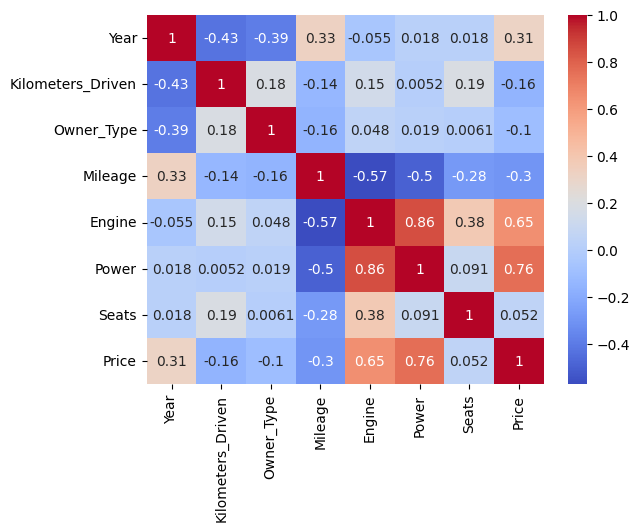

In [1564]:
corr = X[['Year','Kilometers_Driven','Owner_Type','Mileage','Engine','Power','Seats','Price']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<h1>Training</h1>

In [1565]:
Xmean=X_train.mean()
Xstd=X_train.std()
Ystd=Y_train.std().item()
Ymean=Y_train.mean().item()
X_train = normx(X_train)
Y_train = normy(Y_train)

In [1566]:
print(X_train.isna().sum())


Year                   0
Kilometers_Driven      0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Fuel_Type_Electric     0
Fuel_Type_Petrol       0
Transmission_Manual    0
dtype: int64


In [1567]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [1568]:
print(np.isnan(X_train).sum())


0


In [1569]:
W_train = np.ones((X_train.shape[1], 1))
B_train= 0.0

In [1570]:
def compute_cost(Y,Yp):
    cost = (Y-Yp)**2/(2*Y.size)
    return cost.sum()

def z_calc(X,W,B):
    return np.matmul(X,W)+B

In [1571]:
Z_train=z_calc(X_train,W_train,B_train)
Z_train

array([[ 1.03950626],
       [-0.36799734],
       [-0.52981301],
       ...,
       [-3.04828393],
       [-0.77593362],
       [-1.86000262]])

In [1572]:
print(X_train.shape)
print(Y_train.shape)
print(Z_train.shape)

(3644, 10)
(3644, 1)
(3644, 1)


In [1573]:
W_history=[]
B_history=[]
Z_history=[]
J_history=[]
W_history.append(W_train)
B_history.append(B_train)
Z_history.append(Z_train)
J_history.append(compute_cost(Y_train,Z_train))

In [1574]:
def gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train):
    for i in range(epoch):
        W_history.append(W_history[-1]-alpha/X_train.shape[0]*X_train.T@(Z_train-Y_train))
        B_history.append(B_history[-1]-alpha/X_train.shape[0]*np.sum((Z_train-Y_train)))
        Z_train = z_calc(X_train, W_history[-1], B_history[-1])
        Z_history.append(Z_train)
        J_history.append(compute_cost(Y_train,Z_train))
        if (i%10)==0:
            print("Iteration:",i, "Cost:", J_history[-1])

In [1575]:
epoch=1000
alpha=.4
gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train)

Iteration: 0 Cost: 1.2239614025671632
Iteration: 10 Cost: 0.23495193828725774
Iteration: 20 Cost: 0.17270513662570353
Iteration: 30 Cost: 0.1591835908598526
Iteration: 40 Cost: 0.15535939951410443
Iteration: 50 Cost: 0.15406676089591873
Iteration: 60 Cost: 0.15354757877726577
Iteration: 70 Cost: 0.15330810625793956
Iteration: 80 Cost: 0.15318764000261006
Iteration: 90 Cost: 0.15312421038010096
Iteration: 100 Cost: 0.1530900787802051
Iteration: 110 Cost: 0.15307153068785584
Iteration: 120 Cost: 0.1530614070361058
Iteration: 130 Cost: 0.15305587090595385
Iteration: 140 Cost: 0.15305284093671387
Iteration: 150 Cost: 0.15305118200607376
Iteration: 160 Cost: 0.15305027358531137
Iteration: 170 Cost: 0.15304977610508982
Iteration: 180 Cost: 0.1530495036608599
Iteration: 190 Cost: 0.15304935445527568
Iteration: 200 Cost: 0.1530492727415511
Iteration: 210 Cost: 0.1530492279902148
Iteration: 220 Cost: 0.15304920348167284
Iteration: 230 Cost: 0.15304919005930467
Iteration: 240 Cost: 0.15304918270

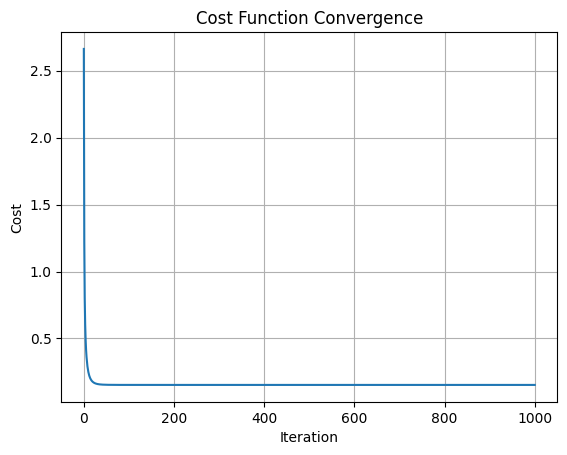

In [1576]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

In [1577]:
Y_train=Y_train*Ystd+Ymean
Z_train=Z_history[-1]
Z_train=Z_train*Ystd+Ymean

In [1578]:
Z_train.min()

np.float64(-15.177254546620095)

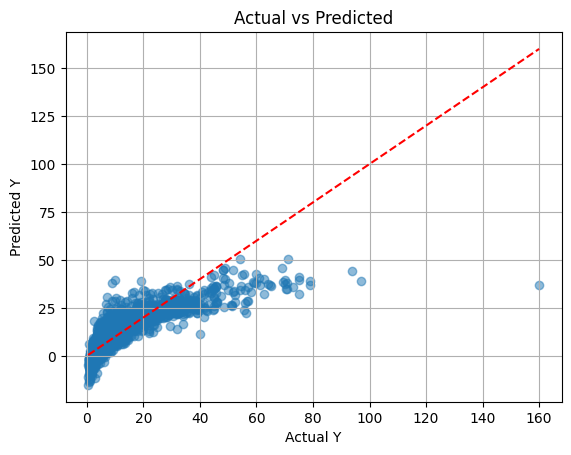

In [1579]:
plt.scatter(Y_train, Z_train, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [1580]:
ss_res = ((Y_train - Z_train) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_train - Y_train.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.6938176286808115


In [1581]:
W=W_history[-1]
B=B_history[-1]

In [1582]:
W.shape

(10, 1)

<h1>Testing Begins Here</h1>

In [1583]:
X_test=pd.read_csv('Test.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_test=pd.read_csv('Test.csv', usecols=['Price'])

In [1584]:
X_test=preprocessing(X_test)
X_test = normx(X_test)

In [1585]:
X_test[X_test['Fuel_Type_Electric']==True]

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual


In [1586]:
#X_test = X_test.drop(columns=['Fuel_Type_Electric'])

In [1587]:
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

In [1588]:
Y_hat=X_test@W+B
Y_hat = Y_hat*Ystd+Ymean

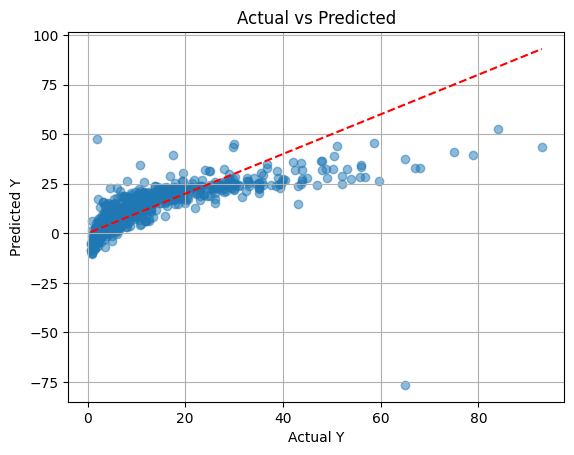

In [1589]:
plt.scatter(Y_test, Y_hat, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [1590]:
ss_res = ((Y_test - Y_hat) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_test - Y_hat.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.5692372975661953


In [1311]:
#R2 score 1 (No outlier removal): 0.5359170687614954
#R2 score 2 (After just adding mileage mask): 0.5467357536866696  
#R2 score 3 (Just engine mask and dropped Fuel_Type_Electric column and no mileage mask): 0.4311169862331051
#R2 score 4 (Mileage mask + Dropped column + Engine mask): 0.44219458559524594
#R2 score 5 (Mileage mask + Dropped column): 0.4297231575559941
#R2 score 6 (Mileage mask + Engine mask without removing the 72cc datapoint so that I don't have to drop the column): 0.5549321408556139
#R2 score 7 (Same as 6 but tweaking the engine mask to get best R2): 0.5554031301729788
#R2 score 8 (Added a power mask too): 0.5692372975661953